<a href="https://colab.research.google.com/github/PyBlin/Study/blob/main/Py_ML_Study/Chap2_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.사이킷런 소개와 특징

In [1]:
# 설치 (이왕이면 conda로 설치하세요~)
# conda install scikit_learn
# pip install scikit_learn

In [2]:
# version check
import sklearn

sklearn.__version__

'0.22.2.post1'

# 2.붓꽃 품종 예측하기

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

* `sklearn.datasets` : 사이킷런 내에서 자체적으로 제공하는 데이터셋을 생성하는 모듈의 모임입니다.
* `sklearn.tree` : Tree 기반 ML 알고리즘을 구현한 클래스의 모임입니다.
* `sklearn.model_selection` : 학습/검증/예측 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임입니다.
* 하이퍼 파라미터 : ML 알고리즘별로 최적의 학습을 위해 직접 입력하는 파라미터들을 통칭하며, 하이퍼 파라미터를 통해 ML 알고리즘의 성능을 튜닝할 수 있습니다.
* `load_iris` : 붓꽃 데이터셋을 생성합니다.
* `DecisionTreeClassifier` : ML 알고리즘의 의사결정트리를 적용합니다.
* `train_test_split` : 학습 데이터와 테스트 데이터로 분리합니다.

In [4]:
import pandas as pd

# iris data loading
iris = load_iris()

# iris.data : 붓꽃 데이터셋에서 피처만으로 된 데이터를 numpy로 가지고 있습니다.
iris_data = iris.data

# iris.target : 붓꽃 데이터셋에서 레이블(결정값) 데이터를 numpy로 가지고 있습니다.
iris_label = iris.target
print('iris target value : ', iris_label)
print('iris target name : ', iris.target_names)

# 붓꽃 데이터셋을 자세히 보기 위해 df로 변환합니다.
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target value :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target name :  ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


* 레이블(결정값) : 0(setosa), 1(versicolor), 2(virginica)

In [5]:
# 학습용 데이터와 테스트용 데이터 분리
# X_train : 학습용 피처 데이터셋
# X_test : 테스트용 피처 데이터셋
# y_train : 학습용 레이블 데이터셋
# y_test : 테스트용 레이블 데이터셋
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, 
                                                    test_size=0.2, 
                                                    random_state=11)

* `iris_data` : 피처 데이터셋입니다.
* `iris_label` : 레이블 데이터셋입니다.
* `test_size` : 학습 데이터와 테스트 데이터를 비율로 분할합니다.
* `random_state` : 호출할 때마다 같은 학습/테스트용 데이터셋을 생성하기 위한 난수 발생값입니다.

    * `train_test_split()` 함수는 호출 시 무작위로 데이터를 분리하므로 `random_state`를 지정하지 않으면 수행할 때마다 다른 학습/테스트용 데이터를 만들 수 있습니다. seed와 같은 의미로, 아무 값으로 지정해도 무관합니다.

In [6]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

* `fit(학습용 피처셋, 학습용 레이블셋)` : 학습을 수행합니다.

In [7]:
# 테스트용 피처 데이터셋으로 예측 수행
pred = dt_clf.predict(X_test)

In [8]:
# 여러 가지 ML 모델 성능 평가 방법 중 정확도를 측정
from sklearn.metrics import accuracy_score

print(f'예측 정확도 : {accuracy_score(y_test, pred):.4f}')

예측 정확도 : 0.9333


* `accuracy_score(실제 레이블셋, 예측 레이블셋)` : 정확도를 예측합니다.

# 3.사이킷런 기반 프레임워크 익히기

## 3.1 Estimator 이해 및 fit(), predict() 메서드

* Estimator : 지도학습의 모든 알고리즘을 구현한 클래스
    * Classifier : 분류 알고리즘을 구현한 클래스
        * Decision Tree Classifier
        * Random Forest Classifier
        * Gradient Boosting Classifier
        * Gaussian NB
        * SVC
    * Regressor : 회귀 알고리즘을 구현한 클래스
        * Linear Regression
        * Ridge
        * Lasso
        * Random Forest Regressor
        * Gradient Boosting Regressosr

* 지도학습
    * `fit()` : 학습
    * `predict()` : 예측

* 비지도학습
    * `fit()` : 입력 데이터의 형태에 맞춰 데이터 변환
    * `transform()` : 차원변환, 클러스터링, 피처 추출 등의 실제 작업

In [9]:
# fit_transform() = fit() + transform()

## 3.2 사이킷런의 주요 모듈

* 예제 데이터
    * `sklearn.datasets` : 예제 데이터셋

* 피처 처리
    * `sklearn.preprocessing` : 전처리에 필요한 다양한 기능 제공
    * `sklearn.feature_selection` : 피처를 우선순위대로 선택하는 다양한 기능 제공
    * `sklearn.feature_extraction` : 텍스트/이미지 데이터의 벡터화된 피처를 추출
        - `sklearn.feature_extraction.text`
        - `sklearn.feature_extraction.image`

* 피처 처리 & 차원 축소
    * `sklearn.decomposition` : 차원 축소와 관련한 알고리즘을 지원

* 데이터 분리, 검증 & 파라미터 튜닝
    * `sklearn.model_selection` : 교차 검증을 위한 학습용/테스트용 분리
        - Grid Search로 최적 파라미터 추출 등의 API 제공

* 평가
    * `sklearn.metrics` : 분류, 회귀, clustering, pairwise에 대한 다양한 성능 측정 방법 제공
        - Accuracy, Precision, Recall, ROC-AUC, RMSE 등 제공

* ML 알고리즘
    * `sklearn.ensemble` : 앙상블 알고리즘 제공
        - Random Forest, Ada Boost, Gradient Boost 등을 제공
    * `sklearn.linear_model` : 회귀 및 SGD(경사하강법) 관련 알고리즘을 지원
    * `sklearn.naive_bayes` : 나이브 베이즈 알고리즘 제공
        - 가우시안 NB, 다항분포 NB 등
    * `sklearn.neighbors` : 최근접 이웃 알고리즘 (K-NN) 제공
    * `sklearn.svm` : Support Vector Machine 알고리즘 제공
    * `sklearn.tree` : Decision(의사결정) Tree 알고리즘 제공
    * `sklearn.cluster` : 비지도 클러스터링 알고리즘 제공
        - K-평균, 계층형, DBSCAN 등

* 유틸리티
    * `sklearn.pipeline` : 피처 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 함께 묶어서 실행할 수 있는 유틸리티 제공

In [10]:
# ML model process

"""
1. 피처 처리 (가공, 변경, 추출)
2. ML 알고리즘 학습/예측
3. 모델 평가
"""

'\n1. 피처 처리 (가공, 변경, 추출)\n2. ML 알고리즘 학습/예측\n3. 모델 평가\n'

## 3.3 내장된 예제 데이터 세트

* 분류 or 회귀 연습용 예제 데이터셋 (dictionary 형태)
    * `datasets.load_boston()` : 회귀용, 보스턴 집 데이터셋
    * `datasets.load_breast_cancer()` : 분류용, 위스콘신 유방암 데이터셋
    * `datasets.load_diabetes()` : 회귀용, 당뇨 데이터셋
    * `datasets.load_digits()` : 분류용, 0 ~ 9 숫자 이미지 픽셀 데이터셋
    * `datasets.load_iris()` : 분류용, 붓꽃 데이터셋

* 분류 and 클러스터링 표본 데이터 생성기
    * `datasets.make_classifications()` : 분류용 데이터셋 만들기
        - 높은 상관도, 불필요한 속성 등의 노이즈 효과를 위한 데이터를 무작위로 생성
    * `datasets.make_blobs()` : 클러스터링 데이터셋 만들기 (random)
        - 군집 지정 갯수에 따라 여러 가지 클러스터링을 위한 데이터셋을 쉽게 생성

* fetch 계열 데이터 : 데이터 크기가 너무 커서 인터넷 다운로드 필요
    - 서브 디렉터리 scikit_learn_data에 저장한 후 추후 불러들이는 데이터.
        - `fetch_covtype()` : 회귀 분석용 토지 조사 자료
        - `fetch_20newsgroups()` : 뉴스 그룹 텍스트 자료
        - `fetch_olivetti_faces()` : 얼굴 이미지 자료
        - `fetch_lfw_people()` : 얼굴 이미지 자료
        - `fetch_lfw_pairs()` : 얼굴 이미지 자료
        - `fetch_rcv1()` : 로이터 뉴스 말뭉치
        - `fetch_mldata()` : ML 웹사이트에서 다운로드

In [11]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

# key 값 확인
keys = iris_data.keys()
print(f'\niris data set keys : {keys}')

<class 'sklearn.utils.Bunch'>

iris data set keys : dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [12]:
print(f"\nfeature_names's type : {type(iris_data.feature_names)}")
print(f"feature_names's shape : {len(iris_data.feature_names)}")
print(iris_data.feature_names)

print(f"\ntarget_names's type : {type(iris_data.target_names)}")
print(f"target_names's shape : {len(iris_data.target_names)}")
print(iris_data.target_names)

print(f"\ndata's type : {type(iris_data.data)}")
print(f"data's shape : {iris_data.data.shape}")
print(iris_data['data'][:5])

print(f"\ntarget's type : {type(iris_data.target)}")
print(f"target's shape : {iris_data.target.shape}")
print(iris_data.target)


feature_names's type : <class 'list'>
feature_names's shape : 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

target_names's type : <class 'numpy.ndarray'>
target_names's shape : 3
['setosa' 'versicolor' 'virginica']

data's type : <class 'numpy.ndarray'>
data's shape : (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

target's type : <class 'numpy.ndarray'>
target's shape : (150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# 4.Model Selection 모듈 소개

## 4.1 train_test_split()

In [13]:
# 테스트 데이터셋을 이용하지 않고 무엇이 문제인지 확인해보기
# 한마디로 학습과 예측을 동일한 데이터셋으로 수행
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터셋으로 예측 수행
pred = dt_clf.predict(train_data)
print(f"예측 정확도 : {accuracy_score(train_label, pred)}")

예측 정확도 : 1.0


* 정확도가 100%...? 이건 그냥 컨닝한거나 다름없습니다.
* 이제 `train_test_split()`으로 학습용과 테스트용 데이터셋을 분리해봅시다.

In [14]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

iris_data = load_iris()
dt_clf = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, 
                                                    iris_data.target, 
                                                    test_size=0.3, 
                                                    random_state=121)

* `train_test_split(피처 데이터셋, 레이블 데이터셋)`
* `test_size` : 테스트 데이터셋 크기를 결정합니다. (default=0.25)
* `shuffle` : 데이터 분리 전에 데이터를 섞을지 결정합니다. (default=True)
* `random_state` : 지정하지 않으면 수행할 때마다 다른 학습용/테스트용 데이터셋을 생성합니다.

In [15]:
# 의사결정나무를 학습하고 예측 정확도를 측정
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print(f"예측 정확도 : {accuracy_score(y_test, pred):.4f}")

예측 정확도 : 0.9556


## 4.2 교차 검증 (Cross Validation)

### 4.2.1 K-fold 교차 검증

In [16]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


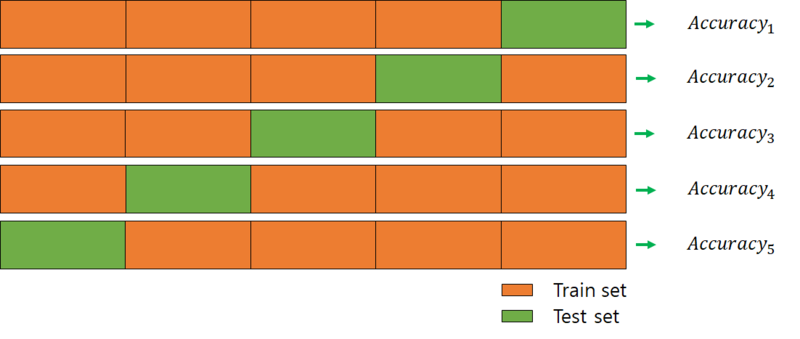

In [17]:
from IPython.display import Image
Image("/drive/MyDrive/Colab/ML_Study/kfold.png")

In [18]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris_data = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier()

# 5개의 폴드셋으로 분리하는 KFold 객체와 폴드셋별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=5)
cv_accuracy = []
print(f"붓꽃 데이터셋 크기 : {features.shape[0]}")

붓꽃 데이터셋 크기 : 150


* 전체 데이터셋 150을 5등분 하면
    - 학습용 데이터셋 : 120개
    - 검증용 데이터셋 : 30개

In [19]:
n_iter = 0

# split()를 호출하면 폴드별 학습용/검증용 테스트의 row index를 array로 반환
for train_index, test_index in kfold.split(features):

    # kfold.split()으로 반환된 인덱스를 이용해 학습용/검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]

    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1

    # 반복할 때마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print(f"\n#{n_iter} 교차 검증 정확도 : {accuracy}, \
    학습 데이터 크기 : {train_size}, \
    검증 데이터 크기 : {test_size}")
    print(f"#{n_iter} 검증셋 인덱스 : {test_index}")
    cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print(f"\n## 평균 검증 정확도 : {np.mean(cv_accuracy):.4f}")


#1 교차 검증 정확도 : 1.0,     학습 데이터 크기 : 120,     검증 데이터 크기 : 30
#1 검증셋 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 : 1.0,     학습 데이터 크기 : 120,     검증 데이터 크기 : 30
#2 검증셋 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 : 0.8667,     학습 데이터 크기 : 120,     검증 데이터 크기 : 30
#3 검증셋 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 : 0.9333,     학습 데이터 크기 : 120,     검증 데이터 크기 : 30
#4 검증셋 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 : 0.7667,     학습 데이터 크기 : 120,     검증 데이터 크기 : 30
#5 검증셋 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도 : 0.9133


### 4.2.2. Stratified K-fold

* 불균형한 분포도를 가진 레이블 데이터 집합을 위한 K-fold 방식
* ex) 대출사기 : 0.0001% 확률로 대출 사기 레이블이 존재

In [20]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

* 레이블 값이 0(Setosa), 1(Versicolor), 2(Virginica) 모두 50개로 동일합니다.
* 먼저 KFold를 사용하여 문제점을 알아봅시다.

In [21]:
# 3개의 폴드셋을 KFold로 생성
# 교차 검증을 할 때마다 생성되는 학습용/검증용 레이블 데이터 값의 분포도 확인
from sklearn.model_selection import KFold

kfold = KFold(n_splits=3)
n_iter = 0

for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print(f"## 교차 검증 : {n_iter}")
    print(f"학습 레이블 데이터 분포 : \n{label_train.value_counts()}")
    print(f"검증 레이블 데이터 분포 : \n{label_test.value_counts()}\n")

## 교차 검증 : 1
학습 레이블 데이터 분포 : 
2    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
0    50
Name: label, dtype: int64

## 교차 검증 : 2
학습 레이블 데이터 분포 : 
2    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
1    50
Name: label, dtype: int64

## 교차 검증 : 3
학습 레이블 데이터 분포 : 
1    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
2    50
Name: label, dtype: int64



* 학습 레이블과 검증 레이블이 완전히 다른 값으로 추출되었습니다.
    - 학습한 데이터를 바탕으로 검증해야하는데, 생뚱맞은 값이 나왔습니다.
    - 이렇게 하면 검증 예측 정확도는 0% 입니다 ㅠㅠ

* Stratified KFold는 이런 문제를 해결해줍니다.
* 이번에는 Stratified KFold를 사용해봅시다.
* 사용 방법은 KFold와 거의 비슷하지만, split() 인자에 레이블 데이터셋을 추가해야 합니다.

In [22]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print(f"## 교차 검증 : {n_iter}")
    print(f"학습 레이블 데이터 분포 : \n{label_train.value_counts()}")
    print(f"검증 레이블 데이터 분포 : \n{label_test.value_counts()}\n")

## 교차 검증 : 1
학습 레이블 데이터 분포 : 
2    34
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
1    17
0    17
2    16
Name: label, dtype: int64

## 교차 검증 : 2
학습 레이블 데이터 분포 : 
1    34
2    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
2    17
0    17
1    16
Name: label, dtype: int64

## 교차 검증 : 3
학습 레이블 데이터 분포 : 
0    34
2    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
2    17
1    17
0    16
Name: label, dtype: int64



* 학습 레이블과 검증 레이블 데이터 값의 분포도가 동일하게 할당되었습니다.
* 이제 StratifiedKFold를 이용해 붓꽃 데이터를 교차 검증해 봅시다.

In [23]:
df_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

# split() 호출 시 반드시 레이블 데이터셋 추가 입력
for train_index, test_index in skfold.split(features, label):
    
    # split()으로 반환된 인덱스를 이용해 학습용/검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]

    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)

    # 반복할 때마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print(f"\n#{n_iter} 교차 검증 정확도 : {accuracy}, \
    학습 데이터 크기 : {train_size}, \
    검증 데이터 크기 : {test_size}")
    print(f"#{n_iter} 검증셋 인덱스 : {test_index}")
    cv_accuracy.append(accuracy)

# 교차 검증별 정확도 및 평균 정확도 계산
print(f"\n## 교차 검증별 정확도 : {np.round(cv_accuracy, 4)}")
print(f"\n## 평균 검증 정확도 : {np.mean(cv_accuracy):.4f}")


#1 교차 검증 정확도 : 0.98,     학습 데이터 크기 : 100,     검증 데이터 크기 : 50
#1 검증셋 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 : 0.94,     학습 데이터 크기 : 100,     검증 데이터 크기 : 50
#2 검증셋 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 : 1.0,     학습 데이터 크기 : 100,     검증 데이터 크기 : 50
#3 검증셋 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도 : [0.98 0.94 1.  ]

## 평균 검증 정확도 : 0.9733


* 일반적으로 분류에서의 교차 검증은 Stratified K-fold로 분할되어야 합니다.
* 회귀에서는 결정값이 연속된 숫자값이기 때문에 결정값별로 분포를 정하는 의미가 없습니다.

### 4.2.3 cross_val_score()

* 주요 파라미터
    * `estimator` : Classifier or Regressor
    * `X` : feature data set
    * `y=None` : label data set
    * `scoring=None` : 예측 성능 평가 지표
    * `cv=None` : 교차 검증 폴드 수

* 기타 파라미터
    * `n_jobs=1`
    * `verbose=0`
    * `fit_params=None`
    * `pre_dispatch='2*n_jobs'`

In [24]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_validate
import numpy as np

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증셋은 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print(f"교차 검증별 정확도 : {np.round(scores, 4)}")
print(f"평균 검증 정확도 : {np.round(np.mean(scores), 4)}")

교차 검증별 정확도 : [0.98 0.94 0.98]
평균 검증 정확도 : 0.9667


* `cross_val_score()` API는 내부에서 estimator를 학습(fit), 예측(predict), 평가(evaluation)시켜주므로 간단하게 교차 검증을 수행할 수 있습니다.
* `cross_val_score()`는 내부적으로 Stratified K-fold를 이용합니다.
* 비슷한 API로 `cross_validate()`가 있습니다.

## 4.3 Grid Search Cross Validation

* 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에!!
* Grid는 "격자"라는 뜻으로, 파라미터를 촘촘하게 입력하면서 테스트하는 방식입니다.

In [25]:
# decision tree algorithm's optimal hyper parameter
grid_parameters = {'max_depth':[1, 2, 3], 'min_samples_split':[2, 3]}
grid_parameters

{'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]}

* depth 1 --> 2, 3
* depth 2 --> 2, 3
* depth 3 --> 2, 3
    - 총 6회에 걸쳐 파라미터를 순차적으로 바꿔 실행하면서 최적의 파라미터와 수행 결과를 도출합니다.
    - 시간이 오래 걸립니다.
    - cv=3 이라면 총 3 x 6 = 18회의 학습/평가가 수행됩니다.

In [26]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, 
                                                    iris_data.target, 
                                                    test_size=0.2, 
                                                    random_state=121)
dtree = DecisionTreeClassifier()

# 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth':[1, 2, 3], 'min_samples_split':[2, 3]}

* GridSearchCV 주요 생성자
    * `estimator` : Classifier, Regressor, Pipeline
    * `param_grid` : "key + 리스트값"을 가지는 딕셔너리가 주어집니다.
        - estimator 튜닝을 위해 파라미터명과 사용될 여러 파라미터값을 지정합니다.
    * `scoring` : 보통 문자열('accuracy')로 지정하나 별도의 함수도 지정할 수 있습니다.
    * `cv`
    * `refit=True` : True로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 후 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습시킵니다.

In [27]:
import pandas as pd

# param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행
# refit=True(default) : 가장 좋은 파라미터 설정으로 재학습
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)
grid_dtree.cv_results_

{'mean_fit_time': array([0.00109132, 0.00040992, 0.00039172, 0.00041246, 0.00044473,
        0.0004611 ]),
 'mean_score_time': array([0.00115657, 0.00031153, 0.00034889, 0.00033315, 0.00030851,
        0.00028626]),
 'mean_test_score': array([0.7       , 0.7       , 0.95833333, 0.95833333, 0.975     ,
        0.975     ]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'min_samples_split': 2},
  {'max_depth': 1, 'min_samples_split': 3},
  {'max_depth': 2, 'min_samples_split': 2},
  {'max_depth': 2, 'min_samples_split': 3},
  {'max_depth': 3, 'min_samples_split': 2},
  {'max_depth': 3, 'min_samples_split': 3}],
 'rank_test_score': array([5, 5, 3, 3, 1, 1], 

* `cv_result_` : `fit()` 수행 후 학습 데이터를 폴딩셋으로 분할하여 `param_grid`에 기술된 하이퍼 
파라미터를 순차적으로 변경하면서 학습/평가를 수행하고 그 결과를 `cv_result_`
속성에 기록합니다.

In [28]:
# GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 
           'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


* params : 수행할 때마다 적용된 하이퍼 파라미터값입니다.
* mean_test_score : 개별 하이퍼 파라미터별로 폴딩 테스트셋에 대해 총 수행한 평가 평균값입니다.
* rank_test_score : 하이퍼 파라미터별로 성능이 좋은 순위입니다. 1일 때 가장 최적의 하이퍼 파라미터입니다.
* split[i]_test_score : cv 값으로 생성된 각각의 폴딩셋(cv=3 --> 3개의 폴딩셋)입니다.

In [29]:
print(f"Grid Search CV 최적 파라미터 : {grid_dtree.best_params_}")
print(f"Grid Search CV 최고 정확도 : {grid_dtree.best_score_:.4f}")

Grid Search CV 최적 파라미터 : {'max_depth': 3, 'min_samples_split': 2}
Grid Search CV 최고 정확도 : 0.9750


* `best_params_` : `fit()` 수행 후 최고 성능의 하이퍼 파라미터값을 `best_params_` 속성에 기록합니다.
* `best_score_` : `fit()` 수행 후 최고 성능의 하이퍼 파라미터값의 평가 결과값을 `best_score_` 속성에 기록합니다.
    - (즉, `cv_result_`의 `rank_test_score=1`일 때의 값입니다.)

In [30]:
# Grid Search CV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# Grid Search CV의 best_estimator_는 이미 최적 학습이 되어 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print(f"Test data set's accuracy : {accuracy_score(y_test, pred):.4f}")

Test data set's accuracy : 0.9667


* `best_estimator_` : `refit=True`이면 GridSearchCV가 최적 성능의 하이퍼 파라미터로 Estimator를 학습하여 `best_esimator_`로 저장합니다.

# 5.데이터 전처리 (Data Preprocessing)

* GIGO (Garbage In, Garbage Out)

## 5.1 Data Encoding

### 5.1.1 Label Encoding

* 카테고리 피쳐를 코드형 숫자값으로 변환합니다.
* 사이킷런의 레이블 인코딩은 LabelEncoder 클래스로 구현합니다.
* LabelEncoder를 객체로 생성한 후 `fit()`과 `transform()`을 호출해 레이블 인코딩을 수행합니다.

In [31]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자렌지', '컴퓨터', 
         '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder를 객체로 생성한 후 fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print(f"인코딩 반환값 : {labels}")

인코딩 반환값 : [0 1 4 5 3 3 2 2]


* TV --> 0
* 냉장고 --> 1
* 전자렌지 --> 4
* 컴퓨터 --> 5
* 선풍기 --> 3
* 믹서 --> 2
    - 문자열이 많은 경우에는 classes_ 속성값으로 확인합니다.

In [32]:
print(f"인코딩 클래스 : {encoder.classes_}")

인코딩 클래스 : ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


In [33]:
print(f"디코딩 원본값 : {encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3])}")

디코딩 원본값 : ['전자렌지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


* `inverse_transform()`을 통해 인코딩된 값을 다시 디코딩할 수 있습니다.

### 5.1.2 One-Hot Encoding

* 레이블 인코딩은 선형 회귀와 같은 알고리즘에는 적용하지 않아야합니다.
* 왜냐하면 숫자에 가중치가 부여될 수 있기 때문입니다.
* 원-핫 인코딩은 이러한 문제점을 해결해줍니다.

In [34]:
# OneHotEncoder 클래스로 쉽게 변환 가능
# 변환 전에 : 모든 문자열은 숫자형으로, 입력값은 2차원으로
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

items = ['TV', '냉장고', '전자렌지', '컴퓨터', 
         '선풍기', '선풍기', '믹서', '믹서']

# 숫자값으로 변환을 위해 LabelEncoder로 변환
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# 2차원 데이터로 변환
labels = labels.reshape(-1, 1)

# One-Hot Encoding 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print(f"One-Hot Encoding Data : \n{oh_labels.toarray()}\n")
print(f"One-Hot Encoding Data Dimension : \n{oh_labels.shape}")

One-Hot Encoding Data : 
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]

One-Hot Encoding Data Dimension : 
(8, 6)


In [35]:
# pandas One-Hot Encoding : get_dummies()
import pandas as pd

df = pd.DataFrame({'item':['TV', '냉장고', '전자렌지', '컴퓨터', 
         '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


* 판다스에는 One-Hot Encoding을 더 쉽게 지원하는 API가 있습니다.
* `get_dummies()`를 이용하면 문자열을 숫자형으로 변환할 필요 없이 바로 가능합니다.

## 5.2 Feature Scaling and Normalization

* Feature Scaling : 서로 다른 변수의 값 범위를 일정 수준으로 맞추는 작업입니다.
* 대표적으로 표준화(Standardization)와 정규화(Normalization)가 있습니다.

* 표준화 : 데이터 피처 각각을 평균이 0, 분산이 1인 가우시안 정규 분포를 가진 값으로 변환합니다.
    - x[i]_new = (x[i]-mean(x)) / stdev(x)
        - x[i]_new : 표준화를 통해 변환될 피처 x의 새로운 i번째 데이터
        - x[i] : 원래 피처 x의 값
        - mean(x) : 피처 x의 평균
        - stdev(x) : 피처 x의 표준편차 (standard deviation)

* 정규화 : 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해줍니다. 즉, 개별 데이터의 크기를 모두 똑같은 단위로 변경합니다.
    - x[i]_new = (x[i]-min(x)) / (max(x)-min(x))

* 사이킷런의 Normalizer 모듈 : 개별 벡터의 크기를 맞추기 위해 변환합니다. 즉, 개별 벡터를 모든 피처 벡터의 크기로 나누어줍니다. (선형대수 개념)
    - x[i]_new = x[i] / (sqrt((x[i])^2 + (y[i])^2 + (z[i])^2))

* 혼선 방지를 위해 일반적인 의미의 표준화와 정규화를 피처 스케일링으로 통칭하고, 선형대수 개념의 정규화를 벡터 정규화로 지칭합니다.

### 5.2.1 Standard Scaler

* 표준화를 쉽게 지원하기 위한 클래스입니다.
* 즉, 개별 피처를 평균이 0, 분산이 1인 값으로 변환해줍니다.

In [36]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터셋을 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print(f"feature mean : \n{iris_df.mean()}\n")
print(f"feature variance : \n{iris_df.var()}")

feature mean : 
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature variance : 
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [37]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# StandardScaler로 데이터셋 변환 : fit(), transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transfrom()에서 변환된 데이터셋이 ndarray로 반환된 것을 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print(f"feature mean : \n{iris_df_scaled.mean()}\n")
print(f"feature variance : \n{iris_df_scaled.var()}")

feature mean : 
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature variance : 
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


* 모든 컬럼값의 평균이 0, 분산이 1에 가까운 값으로 변환되었습니다.

### 5.2.2 Min Max Scaler

* 데이터값을 0 ~ 1 범위값으로 변환합니다. (음수가 있으면 -1 ~ 1)
* 데이터 분포가 가우시안 분포가 아닐 때 적용합니다.

In [38]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터셋을 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)



from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# MinMaxScaler로 데이터셋 변환 : fit(), transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transfrom()에서 변환된 데이터셋이 ndarray로 반환된 것을 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print(f"feature minimum : \n{iris_df_scaled.min()}\n")
print(f"feature maximum : \n{iris_df_scaled.max()}")

feature minimum : 
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature maximum : 
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


* 모든 컬럼값이 0 ~ 1 범위로 변환되었습니다.

## 5.3 학습/테스트 데이터의 스케일링 변환 시 유의점

* scaler 객체를 이용해 학습 데이터셋으로 `fit()`, `transform()`을 적용하면 테스트 데이터셋으로는 다시 `fit()`을 수행하지 않고 학습 데이터셋으로 `fit()`을 수행한 결과를 이용해 `transform()` 변환을 적용해야 합니다.
* 테스트 데이터에 `fit()`을 적용하면 어떤 문제가 생기는지 알아봅시다.

In [39]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0 ~ 10, 테스트 데이터는 0 ~ 5
# Scaler 클래스의 fit(), transform()은 2차원 이상의 데이터만 가능
train_array = np.arange(11).reshape(-1, 1)
test_array = np.arange(6).reshape(-1, 1)
print(f"train_array : \n{train_array}\n")
print(f"test_array : \n{test_array}")

train_array : 
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]

test_array : 
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]


* 여기에 MinMaxScaler를 이용해 변환해봅시다.
* `fit()`을 적용하면 최솟값 0, 최댓값 10, 1/10 Scale이 적용됩니다.
* `transform()`을 호출하면 1/10 Scale로 학습 데이터를 변환합니다.
* 원본 데이터 : 
    - 1 --> 0.1
    - 2 --> 0.2
    - 5 --> 1

In [40]:
"""MinMaxScaler 객체에 별도의 feature_range 파라미터값을 지정하지 않으면 
0~1 값으로 변환"""
scaler = MinMaxScaler()

# fit() --> train_array 최솟값 0, 최댓값 10
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환
train_scaled = scaler.transform(train_array)

print(f"Original train_array data : \n{np.round(train_array.reshape(-1), 2)}\n")
print(f"Scaled train_array data : \n{np.round(train_scaled.reshape(-1), 2)}")

Original train_array data : 
[ 0  1  2  3  4  5  6  7  8  9 10]

Scaled train_array data : 
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [41]:
# 이번에는 테스트 데이터셋을 변환
scaler.fit(test_array)  # 최솟값 0, 최댓값 5

# 1/5 scale
test_scaled = scaler.transform(test_array)

print(f"Original test_array data : \n{np.round(test_array.reshape(-1), 2)}\n")
print(f"Scaled test_array data : \n{np.round(test_scaled.reshape(-1), 2)}")

Original test_array data : 
[0 1 2 3 4 5]

Scaled test_array data : 
[0.  0.2 0.4 0.6 0.8 1. ]


* 학습 데이터와 테스트 데이터의 스케일링이 맞지 않습니다.
    - 학습 데이터 스케일링 : 0, 0.1, 0.2, ... , 1
    - 테스트 데이터 스케일링 : 0, 0.2, 0.4, 0.6, 0.8, 1
* 이제 정상적으로 적용시켜 봅시다.

In [42]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print(f"Original train_array data : \n{np.round(train_array.reshape(-1), 2)}\n")
print(f"Scaled train_array data : \n{np.round(train_scaled.reshape(-1), 2)}\n")

# test_array에 scale 변환 시 : fit() 호출 금지
test_scaled = scaler.transform(test_array)
print(f"Original test_array data : \n{np.round(test_array.reshape(-1), 2)}\n")
print(f"Scaled test_array data : \n{np.round(test_scaled.reshape(-1), 2)}")

Original train_array data : 
[ 0  1  2  3  4  5  6  7  8  9 10]

Scaled train_array data : 
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

Original test_array data : 
[0 1 2 3 4 5]

Scaled test_array data : 
[0.  0.1 0.2 0.3 0.4 0.5]


* 학습 데이터와 테스트 데이터 모두 1/10 수준으로 스케일링 되었습니다.
* 따라서 모두 동일하게 변환되었습니다.
* `fit_transform()`을 적용할 때도 마찬가지입니다. (테스트 데이터에서는 사용 금지)
* 이러한 주의 사항이 발생하므로 학습용/테스트용 분리 전에 전체 데이터셋에 스케일링을 적용하는 것이 바람직합니다.

# 6.Kaggle Titanic

## 6.1 데이터 탐색

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

titanic_df = pd.read_csv('/drive/MyDrive/Colab/Kaggle/Titanic/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
# 학습 데이터셋 정보
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* 판다스의 object 타입은 string으로 봐도 무방합니다.

In [45]:
# 결측치를 Age는 평균값으로, 나머지는 'N'값으로 변경
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print(f"Data set's Null count : \n{titanic_df.isnull().sum()}")

Data set's Null count : 
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [46]:
print(f"Sex : \n{titanic_df['Sex'].value_counts()}\n")
print(f"Cabin : \n{titanic_df['Cabin'].value_counts()}\n")
print(f"Embarked : \n{titanic_df['Embarked'].value_counts()}")

Sex : 
male      577
female    314
Name: Sex, dtype: int64

Cabin : 
N              687
G6               4
B96 B98          4
C23 C25 C27      4
F33              3
              ... 
A10              1
B101             1
B71              1
E77              1
C95              1
Name: Cabin, Length: 148, dtype: int64

Embarked : 
S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


* Cabin의 경우 앞의 알파벳이 중요해 보입니다. 아마 선실 등급과 연관이 있습니다.
* Cabin의 앞 문자만 추출해봅시다.

In [47]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].head()

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

In [48]:
# 성별에 따른 생존자 수
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

* Survived 0은 사망, 1은 생존입니다.
* 남자가 더 많이 사망했습니다.

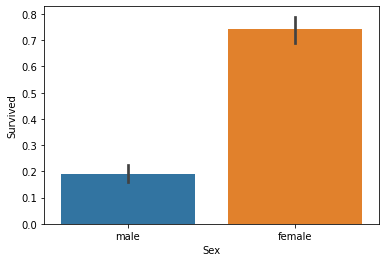

In [49]:
# seaborn barplot
sns.barplot('Sex', 'Survived', data=titanic_df);

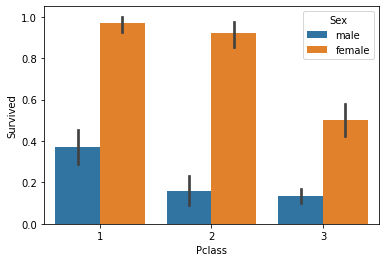

In [50]:
# 객실 등급별 그래프
sns.barplot('Pclass', 'Survived', hue='Sex', data=titanic_df);

* 여성의 경우 3등실의 생존률이 낮습니다.
* 남성의 경우 1등실의 생존률이 높습니다.

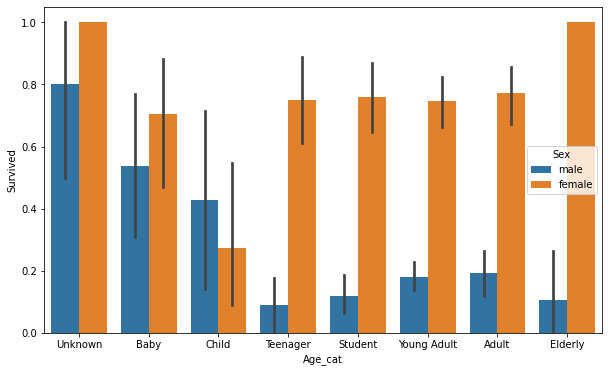

In [51]:
# 나이 그래프 : 범위별로 분류하여 카테고리값을 할당
def get_category(age):
    cat = ''
    if age <= 1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    return cat

# figure 크게 설정
plt.figure(figsize=(10, 6))

# x축 값을 순차적으로 표시
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 
               'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda : get_category() 함수를 반환값으로 지정
# get_category(X) : 입력값으로 'Age' 컬럼을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot('Age_cat', 'Survived', hue='Sex', 
            data=titanic_df, order=group_names)
titanic_df.drop("Age_cat", axis=1, inplace=True)

* 여성 생존률의 경우 Elderly가 높고, Child가 낮습니다.
* 성별, 나이, 객실등급이 생존을 좌우하는 것을 확인하였습니다.

In [52]:
# 남아있는 문자열을 숫자형으로 변환 : Label Encoder
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']

    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


* Sex, Cabin, Embarked의 값이 숫자로 바뀌었습니다.
* 지금까지 가공한 피처를 함수로 정리하여 쉽게 재사용할 수 있도록 만들어 봅시다.

In [53]:
# Null 처리 함수
def titanic_fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# ML 알고리즘에 불필요한 속성 제거
def titanic_drop(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# label encoding
def titanic_le(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 위에서 설정한 데이터 전처리 함수 종합
def transform_features(df):
    df = titanic_fillna(df)
    df = titanic_drop(df)
    df = titanic_le(df)
    return df

## 6.2 Modeling

* 이제 다시 원본 데이터를 로딩하여 적용해봅시다.
* Survived 속성은 레이블이므로 별도로 분리하여 클래스 결정값 데이터셋으로 만듭니다.
* 그리고 Survived 속성을 drop하여 피처 데이터셋을 만듭니다.
* 이렇게 생성된 피처 데이터셋에 `transform_features()`를 적용해 봅시다.

In [54]:
# 원본 데이터를 다시 로드하고 피처 데이터셋과 레이블 데이터셋 추출
titanic_df = pd.read_csv('/drive/MyDrive/Colab/Kaggle/Titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [55]:
# 별도의 테스트 데이터셋 추출
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, 
                                                    test_size=0.2, 
                                                    random_state=11)

In [56]:
# train and predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# sklearn classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# Decision Tree Classifier Modeling
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print(f"DT acc : {accuracy_score(y_test, dt_pred)*100:.2f} %")

# Random Forest Classifier Modeling
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print(f"RF acc : {accuracy_score(y_test, rf_pred)*100:.2f} %")

# Logistic Regression Classifier Modeling
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print(f"LR acc : {accuracy_score(y_test, lr_pred)*100:.2f} %")

DT acc : 78.77 %
RF acc : 85.47 %
LR acc : 84.92 %


* 아직 최적화 작업을 수행하지 않았고, 데이터 양도 충분하지 않기 때문에 어떤 알고리즘이 가장 성능이 좋다고 평가할 수는 없습니다.

## 6.3 Cross Validation Modeling

### 6.3.1 KFold CV

In [57]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # Kfold 객체를 생성하고 폴드 수만큼 예측 결과를 리스트에 저장
    kfold = KFold(n_splits=folds)
    scores = []

    # KFold CV
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):

        # X_titanic_df 에서 CV 별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        # clf 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print(f"CV {iter_count} 정확도 : {accuracy*100:.2f} %")

    # 5개 폴드에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print(f"평균 정확도 : {mean_score*100:.2f} %")

# exec_kfold 호출
exec_kfold(dt_clf)

CV 0 정확도 : 75.42 %
CV 1 정확도 : 78.09 %
CV 2 정확도 : 78.65 %
CV 3 정확도 : 76.97 %
CV 4 정확도 : 82.02 %
평균 정확도 : 78.23 %


* KFold CV의 평균 정확도는 78.23 % 입니다.

### 6.3.2 cross_val_score() API

In [58]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print(f"CV {iter_count} 정확도 : {accuracy*100:.2f} %")
print(f"평균 정확도 : {np.mean(scores)*100:.2f} %")

CV 0 정확도 : 74.30 %
CV 1 정확도 : 77.53 %
CV 2 정확도 : 79.21 %
CV 3 정확도 : 78.65 %
CV 4 정확도 : 84.27 %
평균 정확도 : 78.79 %


* cross_val_score() API는 Stratified KFold를 이용해 폴드셋을 분할하기 때문에 KFold의 평균 정확도와 약간의 차이가 발생합니다.

### 6.3.3 Grid Search CV

* 하이퍼 파라미터 : max_depth, min_samples_split, min_samples_leaf

In [59]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 4, 10], 'min_samples_split':[2, 3, 5], 
              'min_samples_leaf':[1, 5, 8]}
grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, 
                         scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print(f"Grid Search CV 최적 하이퍼 파라미터 : {grid_dclf.best_params_}")
print(f"Grid Search CV 최고 정확도 : {grid_dclf.best_score_}")

# 최적 하이퍼 파라미터로 학습된 Estimator 추출
best_dclf = grid_dclf.best_estimator_

# 모델링
gscv_pred = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, gscv_pred)
print(f"테스트셋에서의 DT 정확도 : {accuracy*100:.2f} %")

Grid Search CV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Grid Search CV 최고 정확도 : 0.7991825076332119
테스트셋에서의 DT 정확도 : 87.15 %


* 하이퍼 파라미터 변경 전보다 약 8% 정도 정확도가 향상됐습니다.
* 사실, 일반적으로 하이퍼 파라미터를 튜닝하더라도 이 정도 수준으로 증가하기는 매우 어렵습니다.
* 테스트용 데이터셋이 작기 때문에 수치상으로 예측 성능이 많이 증가한 것처럼 보이는 겁니다.